In [ ]:
!pip install -q kaggle scikit-learn pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Importation et téléchargement de la dataset

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

path = kagglehub.dataset_download("nelakurthisudheer/dataset-for-predicting-watering-the-plants")

print("Path to dataset files:", path)


100%|██████████| 856k/856k [00:00<00:00, 71.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants/versions/1


In [ ]:
import pandas as pd
import os

os.listdir(path)

df = pd.read_csv(os.path.join(path, "TARP.csv"))
df.head()


,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


Nettoyage et prétraitement des données

In [ ]:
# Aperçu du dataset
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
count,100000.000000,100000.000000,100000.000000,100000.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931
min,1.000000,0.000000,20.000000,0.000000,11.220000,0.000000,0.590000,0.000000,100.500000,3.504752,20.211267,0.000000,5.000000,5.000000
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
50%,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
max,90.000000,45.000000,70.000000,110.000000,45.560000,31.360000,96.000000,133.330000,101.860000,9.935091,298.560117,140.000000,145.000000,205.000000


In [ ]:
df['Status'].value_counts()



,count
Status,
ON,53650
OFF,46350


In [ ]:
df['Status'] = df['Status'].map({'OFF': 0, 'ON': 1})


In [ ]:
# Séparer Features et Target
X = df.drop("Status", axis=1)
y = df["Status"]


In [ ]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Voir s’il y a des valeurs nulles dans chaque colonne

In [ ]:
# Affiche le nombre de valeurs nulles pour chaque colonne
df.isnull().sum()

,0
Soil Moisture,0
Temperature,0
Soil Humidity,0
Time,0
Air temperature (C),76005
Wind speed (Km/h),76005
Air humidity (%),76005
Wind gust (Km/h),76005
Pressure (KPa),76005
ph,97800


In [ ]:
# Affiche le pourcentage de valeurs nulles
(df.isnull().sum() / len(df)) * 100


,0
Soil Moisture,0.000
Temperature,0.000
Soil Humidity,0.000
Time,0.000
Air temperature (C),76.005
Wind speed (Km/h),76.005
Air humidity (%),76.005
Wind gust (Km/h),76.005
Pressure (KPa),76.005
ph,97.800


In [ ]:
# Remplacer toutes les valeurs manquantes par la moyenne de chaque colonne
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
print("Valeurs manquantes restantes :")
print(df.isnull().sum())

Valeurs manquantes restantes :
Soil Moisture          0
Temperature            0
 Soil Humidity         0
Time                   0
Air temperature (C)    0
Wind speed (Km/h)      0
Air humidity (%)       0
Wind gust (Km/h)       0
Pressure (KPa)         0
ph                     0
rainfall               0
N                      0
P                      0
K                      0
Status                 0
dtype: int64


In [ ]:
print("Données prêtes")
print(df.head())
print("Dimensions :", df.shape)

Données prêtes
   Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K  Status  
0  6.502985  202.93

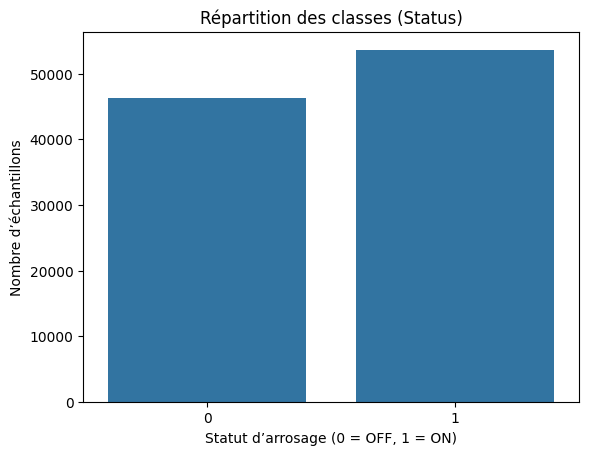

In [ ]:
sns.countplot(data=df, x='Status')
plt.title("Répartition des classes (Status)")
plt.xlabel("Statut d’arrosage (0 = OFF, 1 = ON)")
plt.ylabel("Nombre d’échantillons")
plt.show()

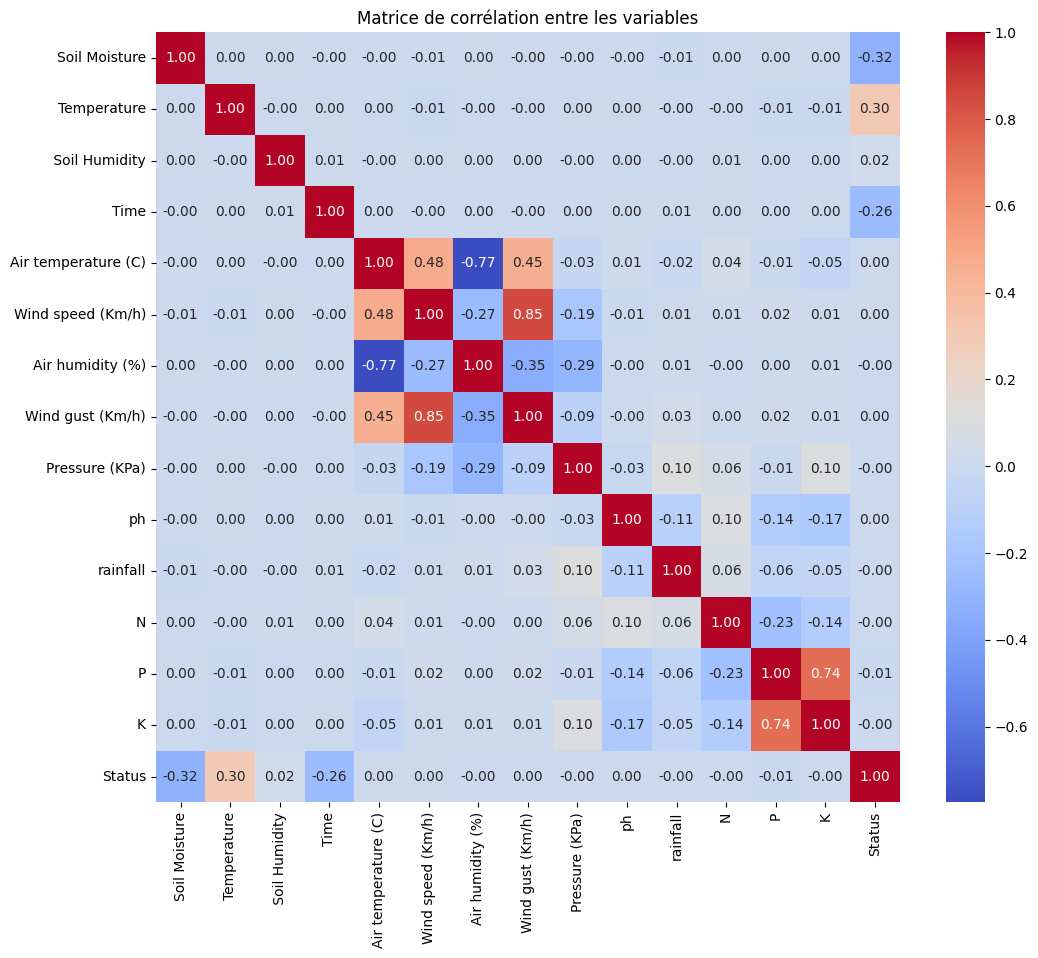

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation entre les variables")
plt.show()

In [ ]:
print(df.columns.tolist())


['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time', 'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)', 'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K', 'Status']


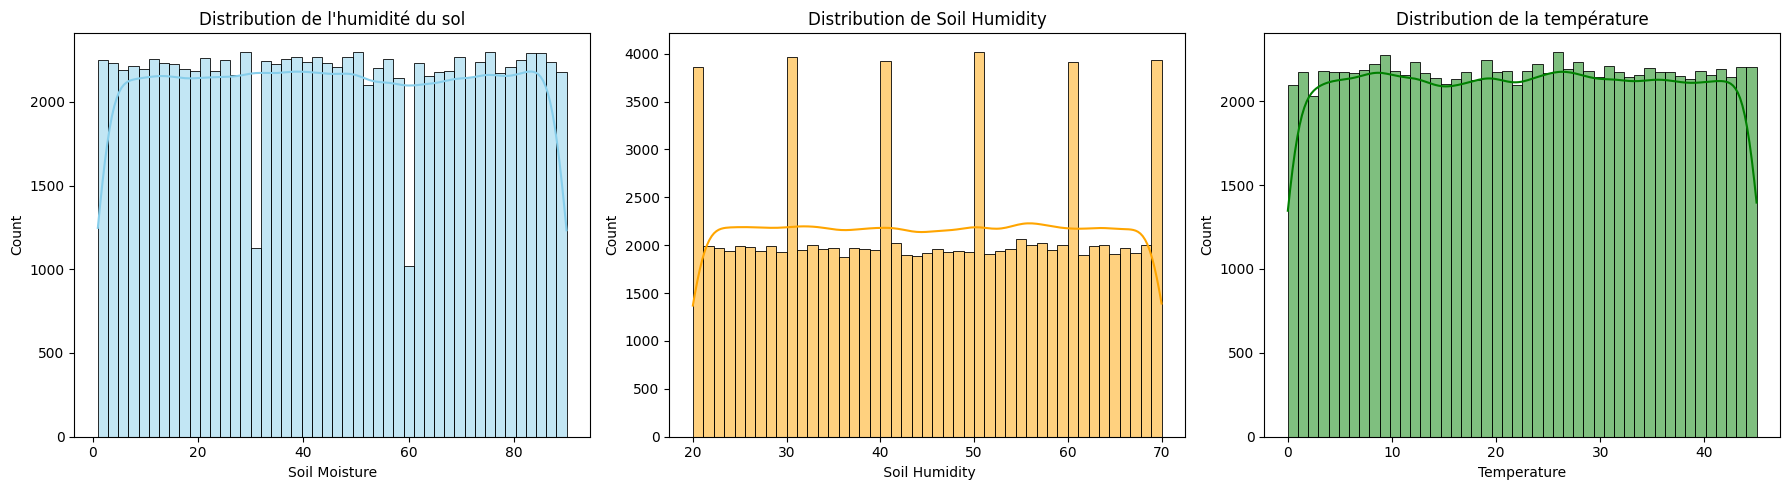

In [ ]:
# Distributions des variables clés
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Soil Moisture'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Distribution de l'humidité du sol")

sns.histplot(df[' Soil Humidity'], kde=True, ax=axs[1], color='orange')
axs[1].set_title("Distribution de Soil Humidity")

sns.histplot(df['Temperature'], kde=True, ax=axs[2], color='green')
axs[2].set_title("Distribution de la température")

plt.tight_layout()
plt.show()

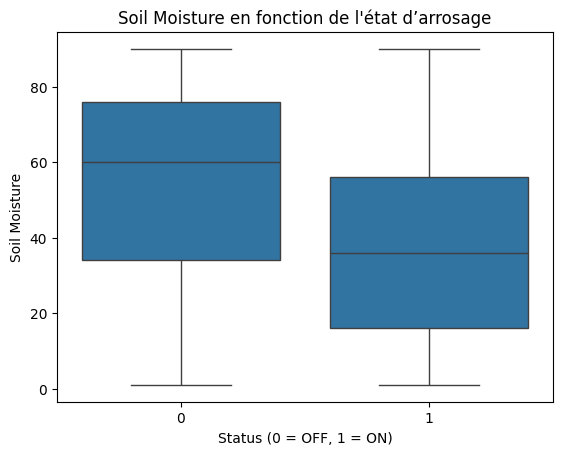

In [ ]:
sns.boxplot(data=df, x='Status', y='Soil Moisture')
plt.title("Soil Moisture en fonction de l'état d’arrosage")
plt.xlabel("Status (0 = OFF, 1 = ON)")
plt.ylabel("Soil Moisture")
plt.show()


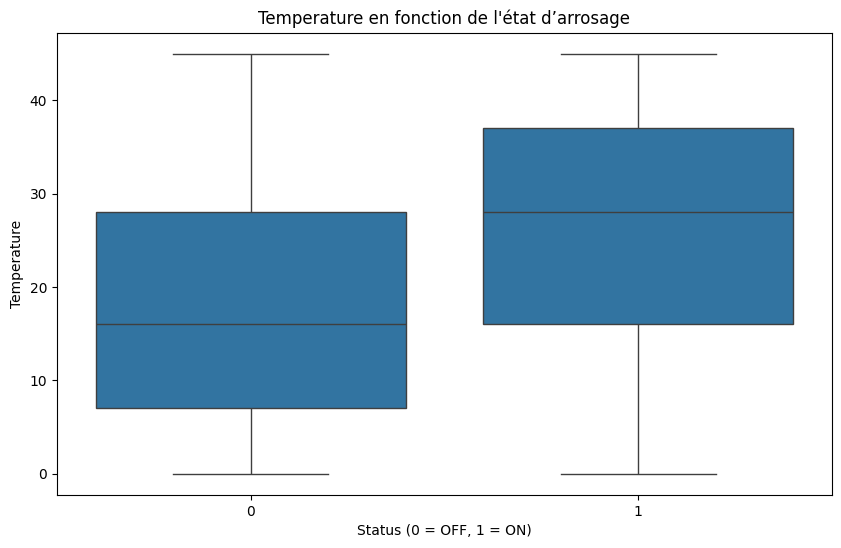

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status', y='Temperature')
plt.title("Temperature en fonction de l'état d’arrosage")
plt.xlabel("Status (0 = OFF, 1 = ON)")
plt.ylabel("Temperature")
plt.show()

In [ ]:
df.columns = df.columns.str.strip()
# Créer un échantillon si le dataset est trop grand
df_sample = df.sample(n=1000, random_state=42)

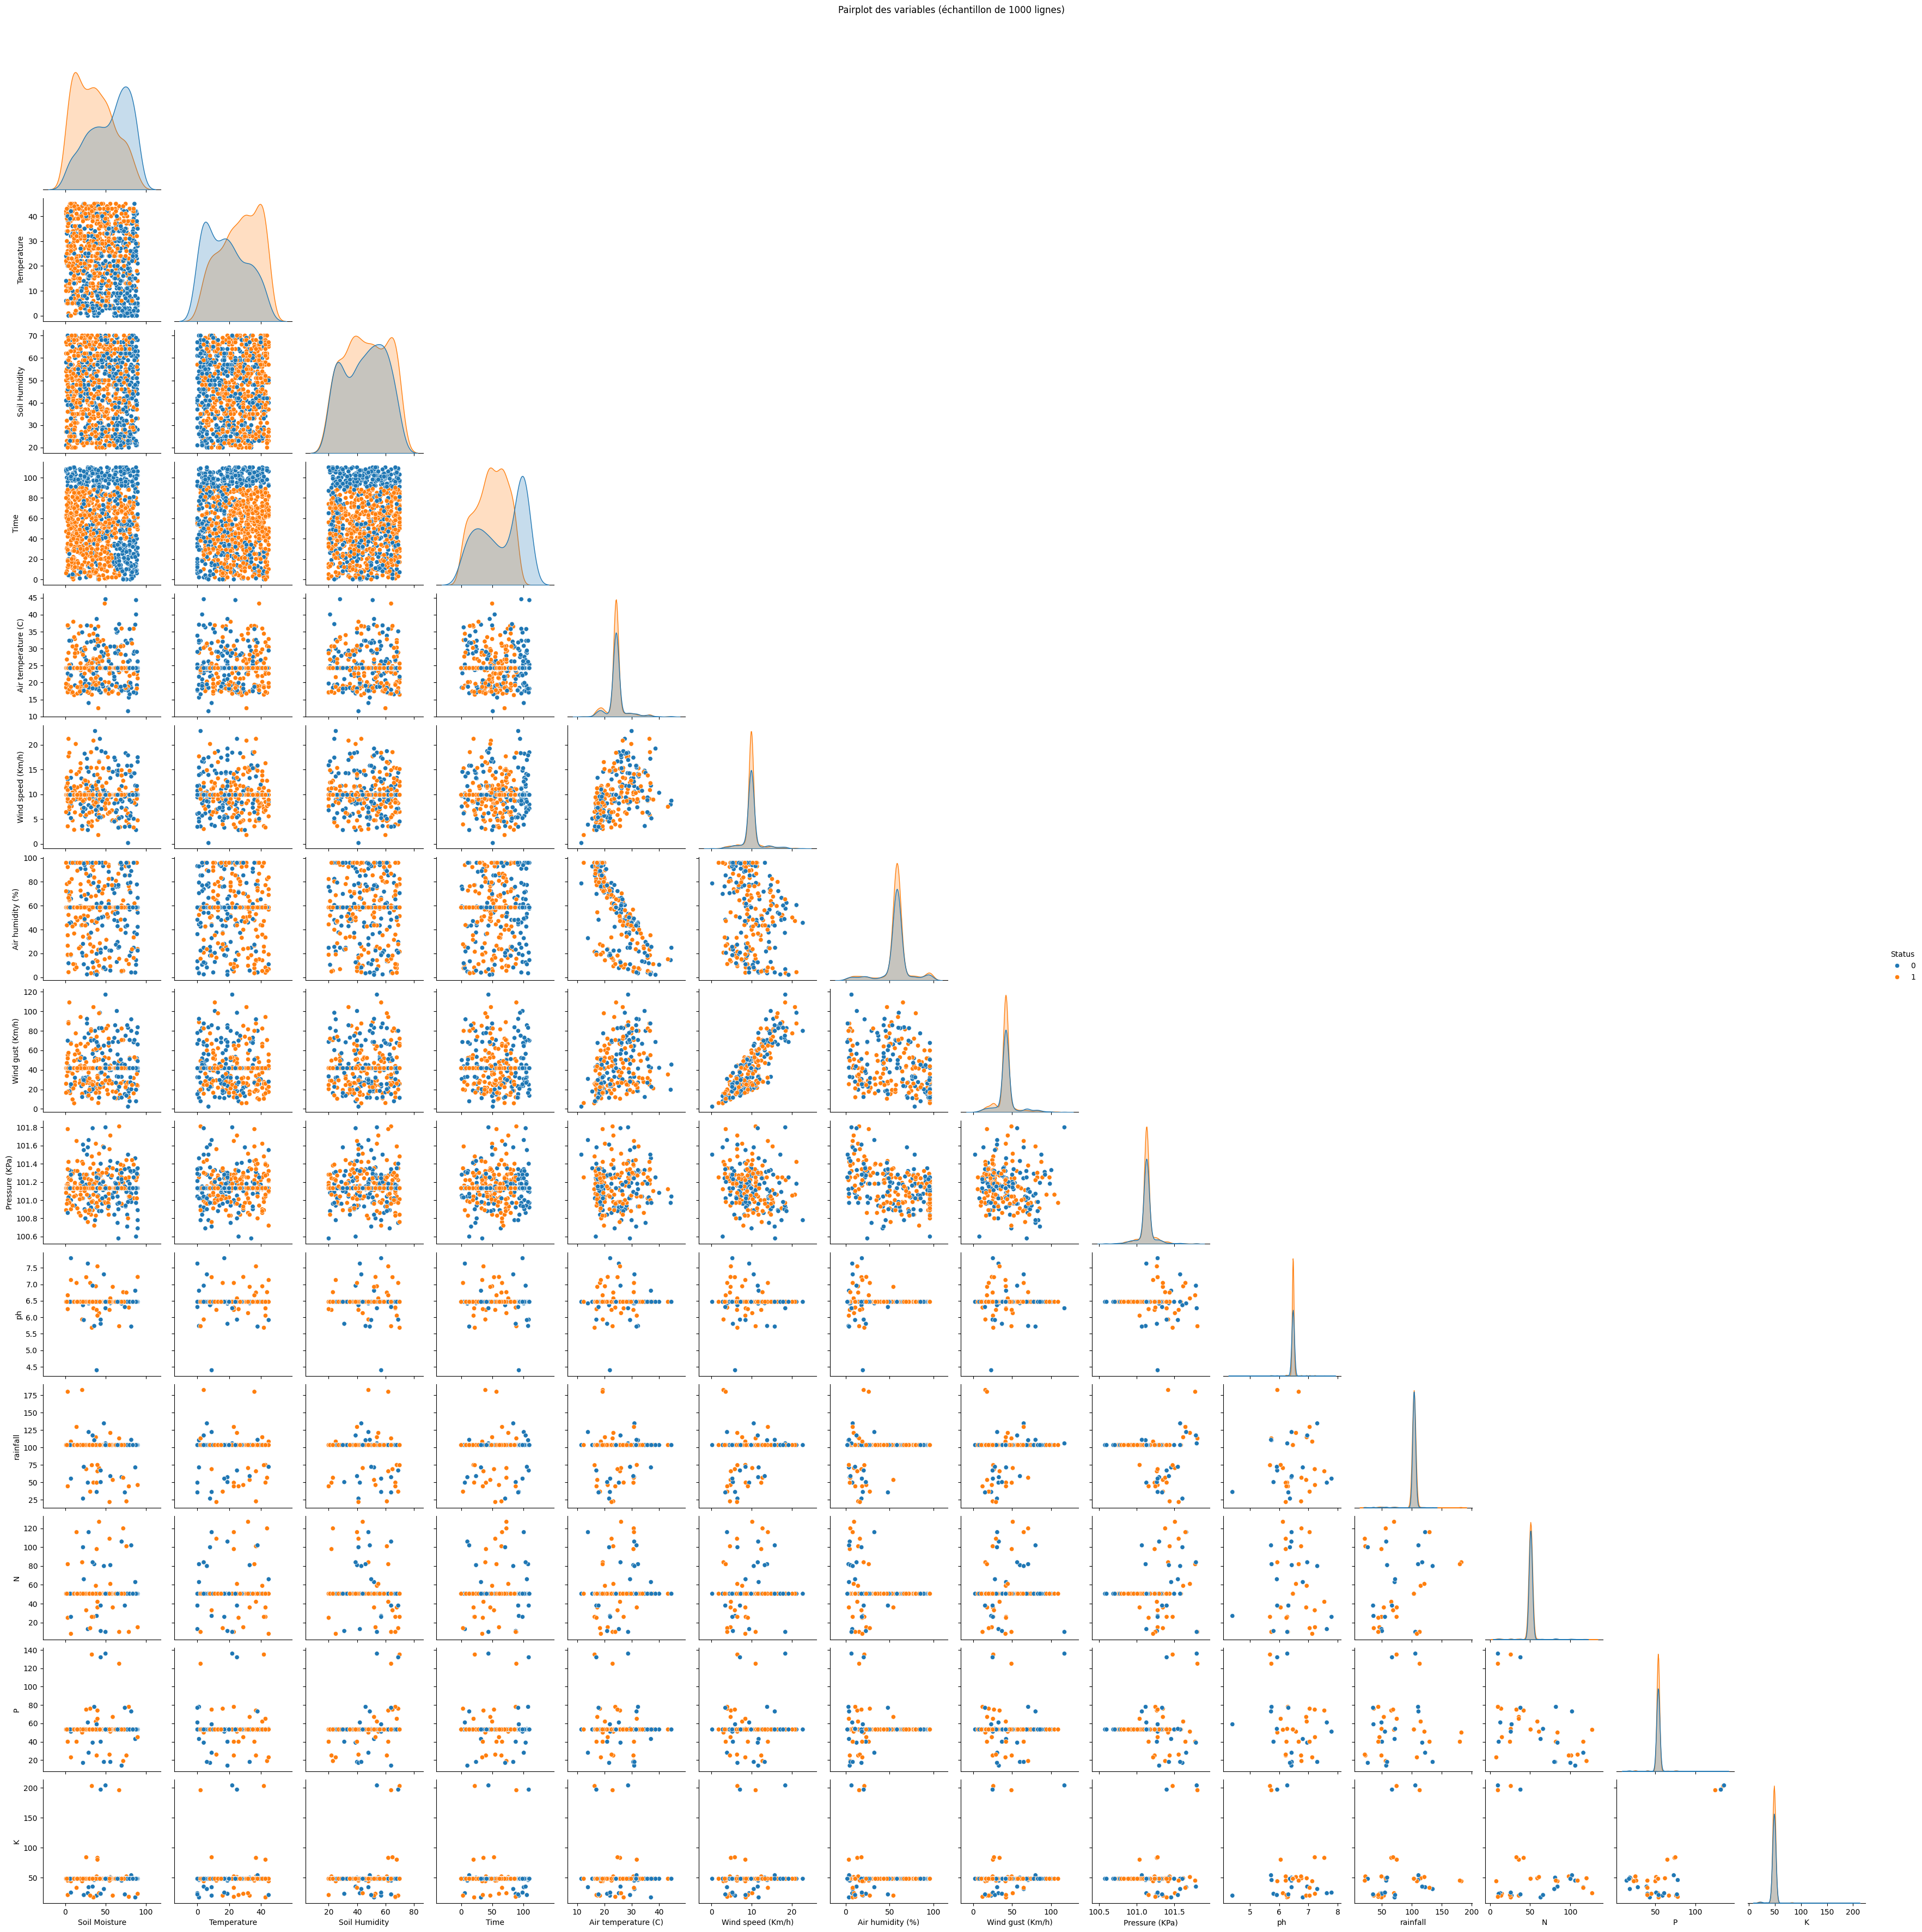

In [ ]:
# Tracer le pairplot
sns.pairplot(df_sample, hue='Status', diag_kind='kde', corner=True)
plt.suptitle("Pairplot des variables (échantillon de 1000 lignes)", y=1.02)
plt.show()

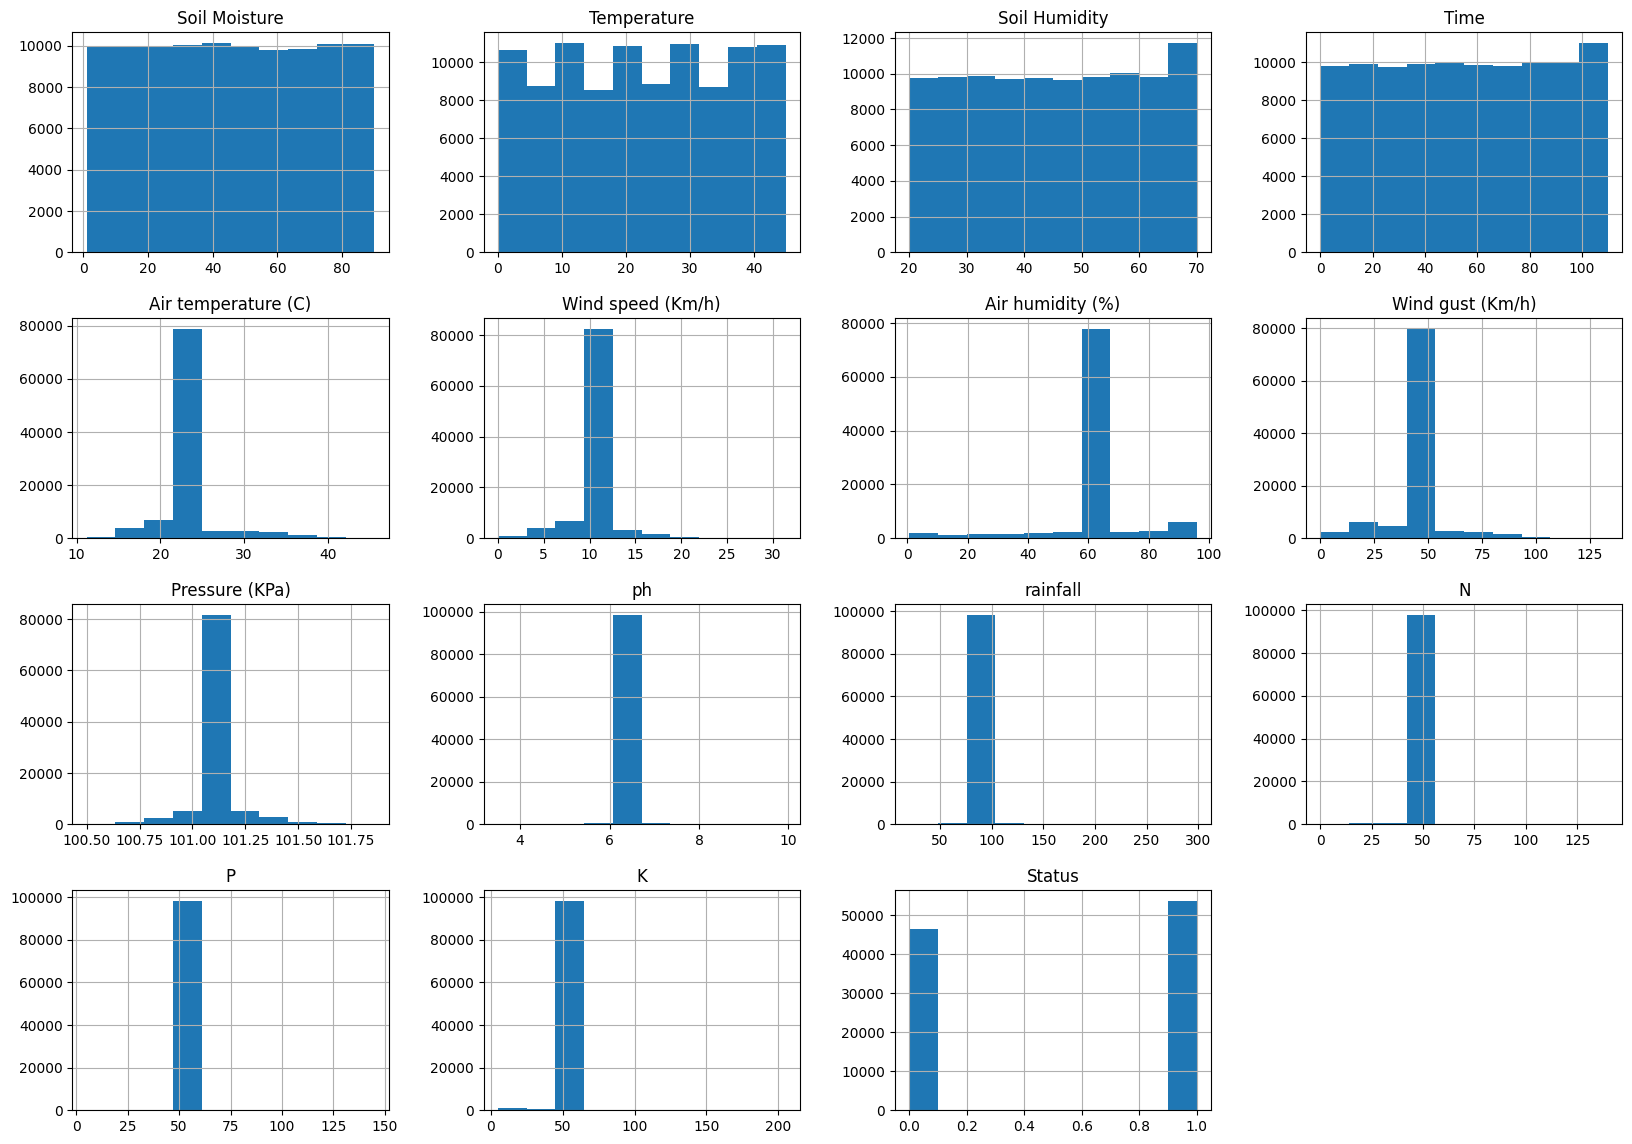

In [ ]:
#Correlation
df.corr()
df.hist(figsize=(20,14))
plt.show()

Entrainement de  4 modèles de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop(columns=['Status'])
y = df['Status']

In [ ]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10, stratify=y
)


In [ ]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
97595,28,45,41,96,24.26378,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
44719,39,17,41,105,24.26378,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
56731,43,5,58,108,24.26378,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
1681,60,30,67,52,27.38000,11.100000,6.080000,58.540000,101.530000,6.969883,101.139435,19.000000,7.000000,9.000000
58052,77,30,23,1,24.26378,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091


In [ ]:
X_test.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
49832,3,34,28,59,24.26378,9.896898,58.521052,41.744905,101.131418,6.46948,103.463655,50.551818,53.362727,48.149091
47584,11,14,67,23,24.26378,9.896898,58.521052,41.744905,101.131418,6.46948,103.463655,50.551818,53.362727,48.149091
89003,17,6,52,98,24.26378,9.896898,58.521052,41.744905,101.131418,6.46948,103.463655,50.551818,53.362727,48.149091
27117,70,38,60,11,24.26378,9.896898,58.521052,41.744905,101.131418,6.46948,103.463655,50.551818,53.362727,48.149091
77133,58,31,33,96,24.26378,9.896898,58.521052,41.744905,101.131418,6.46948,103.463655,50.551818,53.362727,48.149091


In [ ]:
y_train.head()

,Status
97595,0
44719,0
56731,0
1681,1
58052,0


In [ ]:
y_test.head()

,Status
49832,1
47584,1
89003,0
27117,0
77133,0


In [ ]:
# Initialiser les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

In [ ]:
# Entraînement et évaluation
for name, model in models.items():
    print(f"\n {name}")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("\n Classification :")
    print(classification_report(y_test, y_pred))

    print(" Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))


 Decision Tree
Accuracy: 0.9996

 Classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13905
           1       1.00      1.00      1.00     16095

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

 Matrice de confusion :
[[13897     8]
 [    3 16092]]

 Random Forest
Accuracy: 0.9956

 Classification :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13905
           1       0.99      1.00      1.00     16095

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

 Matrice de confusion :
[[13810    95]
 [   38 16057]]

 KNN
Accuracy: 0.9036

 Classification :
              precision    recall  f1-score   support

           0       0.91      0.88  

Évaluation des modèles entraînés

,Modèle,MSE,R²,Accuracy,Precision,Recall,F1
0,Decision Tree,0.000467,0.998123,0.999533,0.999379,0.999751,0.999565
1,Random Forest,0.004333,0.982574,0.995667,0.994364,0.997577,0.995968
2,KNN,0.096367,0.612468,0.903633,0.901240,0.921342,0.911180
3,SVM,0.147233,0.407911,0.852767,0.850944,0.879652,0.865060


/tmp/ipython-input-1611031471.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(results_df["Modèle"], rotation=15, ha="right")
/tmp/ipython-input-1611031471.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(results_df["Modèle"], rotation=15, ha="right")


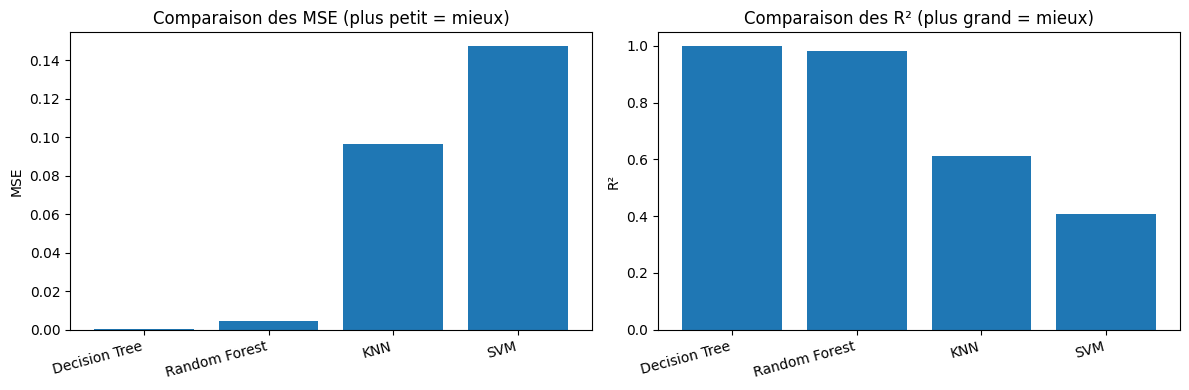

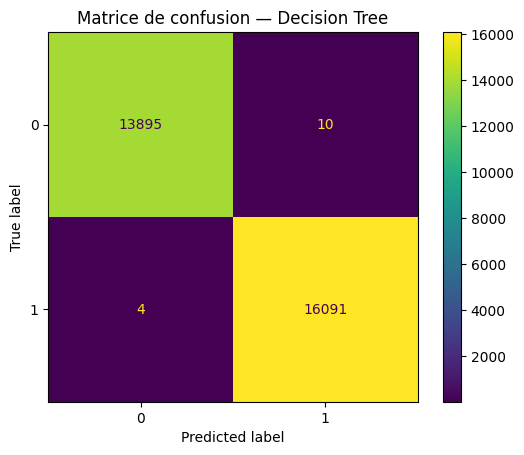

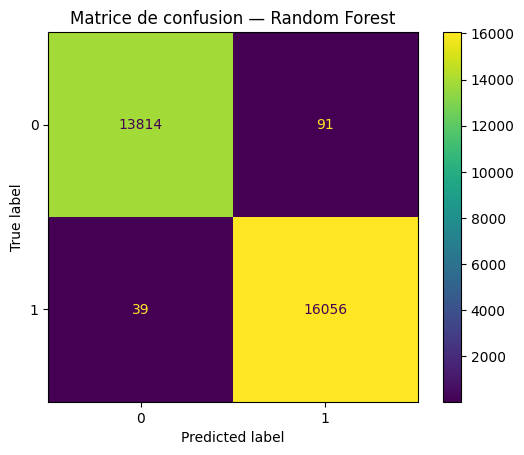

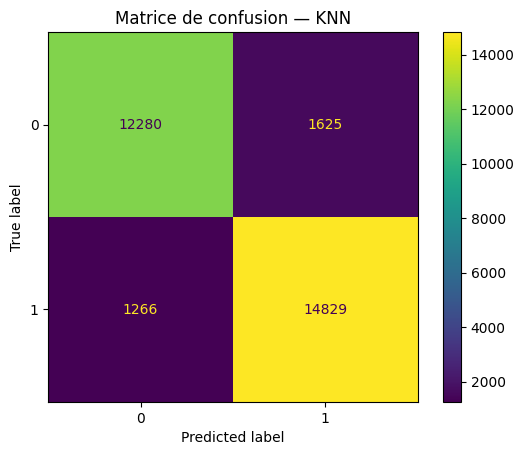

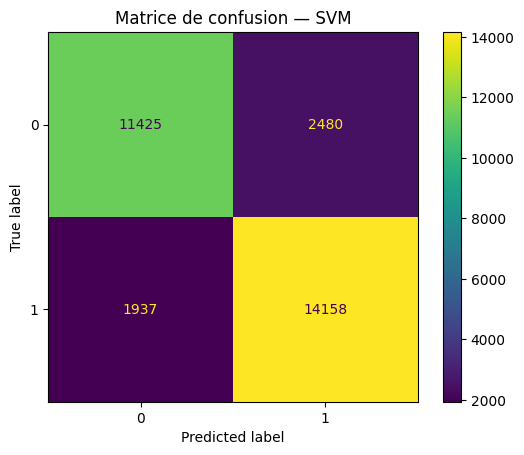

 Meilleur R² : Decision Tree | Meilleur MSE : Decision Tree


In [ ]:
# Évaluation des modèles : MSE et R² (et +)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# --- Option sûr : on retire d'éventuelles colonnes non numériques restantes (au cas où)
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num  = X_test.select_dtypes(include=[np.number])

# --- Définition des modèles
# Arbres/forêt n'ont pas besoin de scaling ; KNN/SVM oui -> on met un Pipeline
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
    ]),
}

results = []
cms = {}  # pour stocker les matrices de confusion

for name, model in models.items():
    # entraînement
    model.fit(X_train_num, y_train)

    # prédiction (étiquettes 0/1)
    y_pred = model.predict(X_test_num)

    # métriques régression (sur labels 0/1 traités numériquement)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # métriques classification utiles pour ton rapport
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Modèle": name,
        "MSE": mse,
        "R²": r2,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

    # matrice de confusion
    cms[name] = confusion_matrix(y_test, y_pred, labels=[0,1])

# ---- Tableau récap
results_df = pd.DataFrame(results).sort_values(by=["MSE","R²","Accuracy"], ascending=[True, False, False])
display(results_df)

# ---- Graphiques comparatifs MSE & R²
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(results_df["Modèle"], results_df["MSE"])
axes[0].set_title("Comparaison des MSE (plus petit = mieux)")
axes[0].set_ylabel("MSE")
axes[0].set_xticklabels(results_df["Modèle"], rotation=15, ha="right")

axes[1].bar(results_df["Modèle"], results_df["R²"])
axes[1].set_title("Comparaison des R² (plus grand = mieux)")
axes[1].set_ylabel("R²")
axes[1].set_xticklabels(results_df["Modèle"], rotation=15, ha="right")
plt.tight_layout()
plt.show()

# ---- Matrices de confusion (une par modèle)
for name, cm in cms.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(values_format="d")
    plt.title(f"Matrice de confusion — {name}")
    plt.show()

# ---- Petite conclusion automatique
best_by_r2  = results_df.iloc[results_df["R²"].idxmax()]["Modèle"]
best_by_mse = results_df.iloc[results_df["MSE"].idxmin()]["Modèle"]
print(f" Meilleur R² : {best_by_r2} | Meilleur MSE : {best_by_mse}")


/tmp/ipython-input-2443010355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results_df, x='R²', y='Modèle', inner='stick', palette='Dark2')


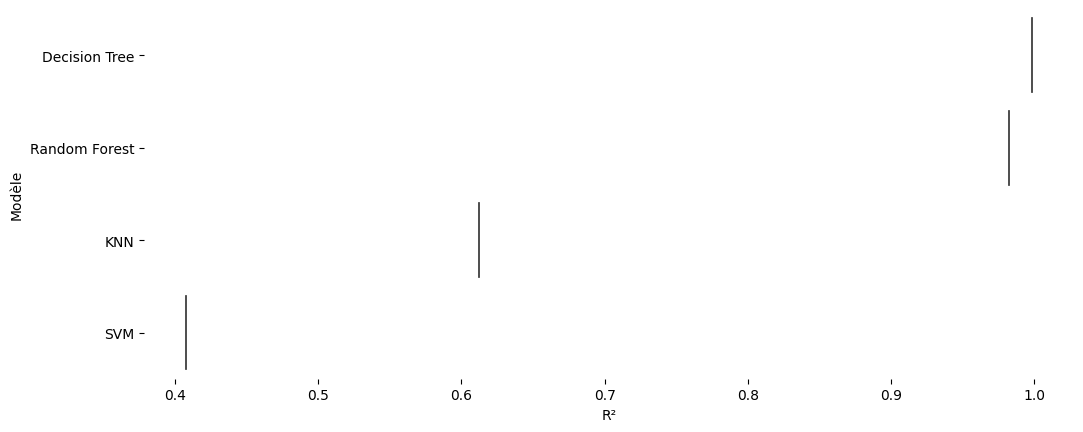

In [ ]:
# @title Modèle vs R²

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Modèle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='R²', y='Modèle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

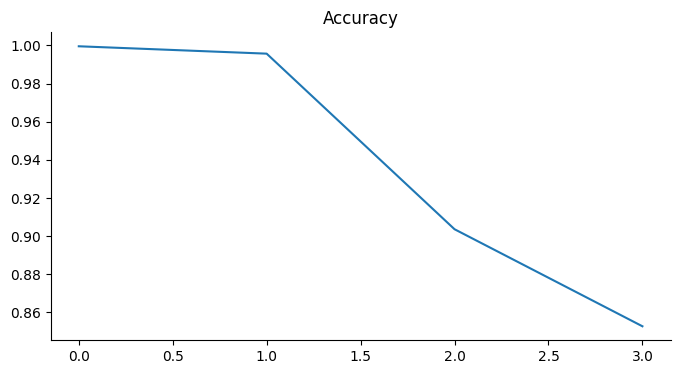

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)